In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
%matplotlib inline

mush_df = pd.read_csv("mushroom_dataset.csv")
mush_df.head()


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [2]:
#understanding the data set
print(mush_df.info())
#There are no null values!

#Descriptive Statistics
print(mush_df.describe())

#Find all numeric columns
print(mush_df.select_dtypes(include=np.number).columns.tolist())
#there are NO numeric... NO nominal columns, only categorical, must be converted


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [3]:
#Creating a test data set without class
test_df = mush_df.drop('class', axis=1)
train_df = mush_df

#find all unique values 
test_uq = test_df.nunique(axis=0).to_list()
test_uq_sum = sum(test_uq)
print(test_uq)

print("The sum of all unique values is: " + str(test_uq_sum) + " so when we do get_dummies we need to see " + 
    str(test_uq_sum) + " columns for the test set")

test_df = pd.get_dummies(test_df)

print(test_df.head())

[6, 4, 10, 2, 9, 2, 2, 2, 12, 2, 5, 4, 4, 9, 9, 1, 4, 3, 5, 9, 6, 7]
The sum of all unique values is: 117 so when we do get_dummies we need to see 117 columns for the test set
   cap-shape_b  cap-shape_c  cap-shape_f  cap-shape_k  cap-shape_s  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            1            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   cap-shape_x  cap-surface_f  cap-surface_g  cap-surface_s  cap-surface_y  \
0            1              0              0              1              0   
1            1              0              0              1              0   
2            0              0              0              1              0   
3            1              0              0              0              1   
4            

In [4]:
#Must DROP one of the class dummy sets, to train properly
train_df = pd.get_dummies(train_df)
#There CANNOT be class E and P, we drop class_p
#class_e = 1 when class = e, class_e = 0 when class = p

train_df = train_df.drop("class_p", axis=1)

print(train_df.head())

#Now we have 118 columns instead of 119, perfect!

   class_e  cap-shape_b  cap-shape_c  cap-shape_f  cap-shape_k  cap-shape_s  \
0        0            0            0            0            0            0   
1        1            0            0            0            0            0   
2        1            1            0            0            0            0   
3        0            0            0            0            0            0   
4        1            0            0            0            0            0   

   cap-shape_x  cap-surface_f  cap-surface_g  cap-surface_s  ...  \
0            1              0              0              1  ...   
1            1              0              0              1  ...   
2            0              0              0              1  ...   
3            1              0              0              0  ...   
4            1              0              0              1  ...   

   population_s  population_v  population_y  habitat_d  habitat_g  habitat_l  \
0             1             0       

1. [10 pts] Report 10-fold CV performances of GaussianNB, linear SVC (use
    SVC(kernel='linear', probability=True)), MLPClassifier, and DecisionTreeClassifier
    with default parameters. Now report the RandomForestClassifier performance too.


In [5]:
# Prepare the input X and y
dfX = train_df.loc[:, train_df.columns != 'class_e']
dfy = train_df.loc[:, train_df.columns == 'class_e'].values.ravel()

# Sanity check
print(f'N={len(dfX)}, M={len(dfX.columns)}')


N=8124, M=117


In [6]:
# Set our main data structures X and y
X = dfX.values
y = dfy

In [7]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

def eval_classifier(_clf, _X, _y):
    acc = []
    kf = StratifiedKFold(n_splits=10, shuffle=False, random_state=None)
    for train_index, test_index in kf.split(_X, _y):
        _clf.fit(_X[train_index], _y[train_index])
        y_pred = _clf.predict(_X[test_index])
        acc += [accuracy_score(_y[test_index], y_pred)]
    return np.array(acc)

In [8]:
from sklearn.naive_bayes import GaussianNB

acc = eval_classifier(GaussianNB(),
                      X, y)
print(f'Naive Bayes CV accuracy={np.mean(acc):.2f} {chr(177)}{np.std(acc):.3f}')


Naive Bayes CV accuracy=0.91 ±0.086


In [9]:
from sklearn.svm import SVC

acc = eval_classifier(SVC(kernel='linear', probability=True),
                      X, y)
print(f'SVM Linear CV accuracy={np.mean(acc):.2f} {chr(177)}{np.std(acc):.3f}')

SVM Linear CV accuracy=0.98 ±0.047


In [10]:
from sklearn.neural_network import MLPClassifier

acc = eval_classifier(MLPClassifier(),
                      X, y)
print(f'Neural Network CV accuracy={np.mean(acc):.2f} {chr(177)}{np.std(acc):.3f}')

Neural Network CV accuracy=0.96 ±0.094


In [11]:
from sklearn.tree import DecisionTreeClassifier

acc = eval_classifier(DecisionTreeClassifier(),
                      X, y)
print(f'Decision Tree CV accuracy={np.mean(acc):.2f} {chr(177)}{np.std(acc):.3f}')

Decision Tree CV accuracy=0.97 ±0.094


In [12]:
from sklearn.ensemble import RandomForestClassifier

acc = eval_classifier(RandomForestClassifier(),
                      X, y)
print(f'Random Forest CV accuracy={np.mean(acc):.2f} {chr(177)}{np.std(acc):.3f}')

Random Forest CV accuracy=0.97 ±0.094


2. [10 pts] Generate an ensemble of 100 classifiers for each of the four classifiers in Q1.
    stored as a list. Set the neural network hidden sizes to (3, 3), max iterations to 30, and
    tolerance to 1e-1. Set the decision tree parameters to max depth of 5 and max features of
    5. We will evaluate these four ensemble classifiers.
    For each of the ensemble, report the first classifier performance in the ensemble.

In [13]:
#Using the bagging method for ensamble at 100

from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier

#setting this to 2 so it finishes faster
kfold = model_selection.KFold(n_splits=2)

clf_gnb = GaussianNB()
clf_svcl = SVC(kernel='linear', probability=True)
clf_nn = MLPClassifier(hidden_layer_sizes=(3,3), max_iter=30, tol=1e-1)
clf_dt = DecisionTreeClassifier(max_depth=5, max_features=5)

num = 100

model_gnb = BaggingClassifier(base_estimator=clf_gnb, n_estimators=num)
model_svcl = BaggingClassifier(base_estimator=clf_svcl, n_estimators=num)
model_nn = BaggingClassifier(base_estimator=clf_nn, n_estimators=num)
model_dt = BaggingClassifier(base_estimator=clf_dt, n_estimators=num)

results_gnb = model_selection.cross_val_score(model_gnb, X, y, cv=kfold)
results_svcl = model_selection.cross_val_score(model_svcl, X, y, cv=kfold)
results_nn = model_selection.cross_val_score(model_nn, X, y, cv=kfold)
results_dt = model_selection.cross_val_score(model_dt, X, y, cv=kfold)


first_acc_gnb = results_gnb[0]
first_acc_svcl = results_svcl[0]
first_acc_nn = results_nn[0]
first_acc_dt = results_dt[0]


print(f'First Naive Bayes CV accuracy={first_acc_gnb:.4f}')
print(f'First SVM Linear CV accuracy={first_acc_svcl:.4f}')
print(f'First Neural Network CV accuracy={first_acc_nn:.4f}')
print(f'First Decision Tree CV accuracy={first_acc_dt:.4f}')

First Naive Bayes CV accuracy=0.7794
First SVM Linear CV accuracy=0.7794
First Neural Network CV accuracy=0.7531
First Decision Tree CV accuracy=0.6891


3. [20 pts] Write a function ensemble_fit() to receive the ensemble (i.e. one of the lists in
    Q2.) and train on one of the subsets of the training data (e.g. random.sample can generate
    a subset). So each classifier will see only a different subset of the training dataset, also
    called as subsampling the input data for training. (Use all features in the subsample)


In [14]:
def features_randomsubset(_M, _m, n_estimators=1):
    from numpy.random import choice
    return [choice(_M, _m, replace=False) for _ in range(n_estimators)]

def ensemble_fit(_pick_clf, _ensemble_cols, _X, _y):
    n_estimators = len(_ensemble_cols)
    ensemble_clf = []
    for j in range(n_estimators):
        Xs = _X[:,_ensemble_cols[j]]
        ensemble_clf += [_pick_clf.fit(Xs, _y)]

    return ensemble_clf


4. [20 pts] Write a function ensemble_predict() to receive the trained ensemble (i.e. one of
    the lists in Q3.) and test on the input. Use a voting scheme such as a histogram on the
    returned predictions by c.predict() by each of the weak classifier. The final prediction
    should be the np.argmax() of those counts. (Note that c.predict_proba() should have
    better results.)
    
    See #5 for the final predictions using np.argmax()

In [15]:

# Using trained ensemble, predict the outcome by majority voting
def ensemble_predict(_ensemble_clf, _ensemble_cols, _Xtest):
    from collections import defaultdict
    n_estimators = len(_ensemble_clf)
    assert n_estimators==len(_ensemble_cols)  # Error check
    # weak learner predictions
    ypred_e, yprob_e = [], []
    for j in range(n_estimators):
        Xs = _Xtest[:,_ensemble_cols[j]]
        res = _ensemble_clf[j].predict(Xs), _ensemble_clf[j].predict_proba(Xs)
        ypred_e += [res[0]]
        yprob_e += [res[1]]  # score/probability of the prediction
    # majority voting for each data point in _Xtest
    ypred = []
    for i in range(_Xtest.shape[0]):
        ypred_scores = defaultdict(float)
        for j in range(n_estimators):
            for c, p in enumerate(yprob_e[j][i]):
                # a proper score is necessary
                ypred_scores[c] += p
        ix = max(ypred_scores.items(), key=lambda a: a[1])
        ypred += [ix[0]]

    return np.array(ypred)

5. [20 pts] Report 10-fold CV performances of the ensembles with a subsample ratio of 0.1.
    Compare to a regular decision tree (same subsample ratio). Now repeat these for
    subsample of 0.001.

In [16]:
%%time

def eval_ensemble(_pick_clf, _X, _y, _niter, _n_estimators, _nfeatures):
    acc = []
    for i in range(_niter):
        cols = features_randomsubset(_X.shape[1], _nfeatures, n_estimators=_n_estimators)
        kf = StratifiedKFold(n_splits=10, shuffle=False, random_state=None)
        for train_index, test_index in kf.split(_X, _y):
            e_clf = ensemble_fit(_pick_clf, cols, _X[train_index], _y[train_index])
            y_pred = ensemble_predict(e_clf, cols, _X[test_index])
            acc += [accuracy_score(_y[test_index], y_pred)]

    return np.array(acc)

gnb_acc = eval_ensemble(clf_gnb, X, y, 10, 100, 10)
#svc1_acc = eval_ensemble(clf_svcl, X, y, 10, 100, 10)
#nn_acc = eval_ensemble(clf_nn, X, y, 100, 200, 11)
#dt_acc = eval_ensemble(clf_dt, X, y, 10, 200, 10)


print(f'GNB Ensemble learners= ' + str(gnb_acc))
print(f'GNB Ensemble learners Final Prediciton= {gnb_acc[np.argmax(gnb_acc)]:.2f}')
#print(f'Linear SVC Ensemble learners= ' + str(svc1_acc))
#print(f'Linear SVC Ensemble Final Prediciton= {svc1_acc[np.argmax(svc1_acc)]:.2f}')
#print(f'Decision Tree Ensemble learners= ' + str(dt_acc))
#print(f'Decision Tree Ensemble Final Prediciton= {dt_acc[np.argmax(dt_acc)]:.2f}')

def clf_fit(_pick_clf,_list_cols, _X, _y):
    Xs = _X[:,_list_cols]
    return _pick_clf.fit(Xs, _y)  # return a single NaiveBayes

def clf_predict(_clf, _list_cols, _X):
    Xs = _X[:,_list_cols]
    return _clf.predict(Xs), _clf.predict_proba(Xs)

def eval_single(_pick_clf,_X, _y, _niters, _nfeatures):
    acc = []
    for j in range(_niters):
        cols = features_randomsubset(_X.shape[1], _nfeatures, n_estimators=1)
        kf = StratifiedKFold(n_splits=10, shuffle=False, random_state=None)
        for train_index, test_index in kf.split(_X, _y):
            clf = clf_fit(_pick_clf, cols[0], _X[train_index], _y[train_index])
            y_pred, y_prob = clf_predict(clf, cols[0], _X[test_index])
            acc += [accuracy_score(_y[test_index], y_pred)]
    return np.array(acc)
    
#individual learner
#single_gnb_acc = eval_single(clf_gnb, X, y, 100, 10)
#single_svc1_acc = eval_single(clf_svcl, X, y, 100, 10)
#single_nn_acc = eval_single(clf_nn, X, y, 100, 10)
#single_dt_acc = eval_single(clf_dt, X, y, 100, 10)

#print(f'GNB single learners= ' + str(single_gnb_acc))
#print(f'GNB single learners average Acc= {np.mean(single_gnb_acc):.2f} {chr(177)}{np.std(single_gnb_acc):.3f}')
#print(f'Decision Tree single learners= ' + str(single_dt_acc))
#print(f'Decision Tree single learners average Acc= {np.mean(single_dt_acc):.2f} {chr(177)}{np.std(single_dt_acc):.3f}')

GNB Ensemble learners= [0.51783518 0.56703567 0.52398524 0.5202952  0.53325123 0.56157635
 0.73768473 0.72044335 0.61330049 0.78078818 0.51783518 0.51783518
 0.51783518 0.51783518 0.51724138 0.51724138 0.51847291 0.51847291
 0.51847291 0.51847291 0.51783518 0.51783518 0.51783518 0.51783518
 0.51724138 0.51724138 0.51847291 0.51847291 0.47044335 0.51847291
 0.48831488 0.51783518 0.51783518 0.51783518 0.51724138 0.51724138
 0.51847291 0.51847291 0.51847291 0.51847291 0.46863469 0.44772448
 0.45756458 0.4403444  0.29064039 0.41133005 0.48029557 0.48029557
 0.46428571 0.4729064  0.51783518 0.51783518 0.51783518 0.51783518
 0.51724138 0.51724138 0.51847291 0.51847291 0.51847291 0.51847291
 0.49815498 0.45387454 0.35670357 0.36777368 0.43472906 0.40147783
 0.56157635 0.56527094 0.80665025 0.83990148 0.51783518 0.51783518
 0.51783518 0.51783518 0.51724138 0.51724138 0.51847291 0.51847291
 0.51847291 0.51847291 0.51783518 0.51783518 0.51783518 0.51783518
 0.51724138 0.51724138 0.51847291 0.518

Marking down tests:
for subsample ratio of 0.1

GNB Ensemble learners Final Prediciton= 0.68
GNB single learners average Acc= 0.66

Decision Tree Ensemble Final Prediciton= 0.68
Decision Tree single learners average Acc= 0.80

Marking down tests:
for subsample ratio of 0.001

GNB Ensemble learners Final Prediciton= 0.74
GNB single learners average Acc= 0.57

Decision Tree Ensemble Final Prediciton= 0.52
Decision Tree single learners average Acc= 0.79

Having trouble running Linear SVC and Neaural Network in this code, machine is not processing.

6. [20 pts] Report and plot 10-fold CV performances of the ensembles for the training
    subsample ratios of (0.0005, 0.001, 0.005, 0.01, 0.03, 0.05, 0.1) on the same graph.
    Add the regular classifiers to the plot with same subsample ratios. (Hint: pass the regular
    classifier to the same ensemble CV in a list of one element. Same script can be used for
    this entire step)
    Report your detailed observations.

In [17]:
# Direct correlation between each column of X and the target y
corrs = np.array([np.correlate(X[:,j], y)[0] for j in range(X.shape[1])])

# Reverse sort, numpy array negation reverses the order
ranks = np.argsort((-corrs))

# Display top-9 and bot-5
rankings = [(f'{corrs[j]:.1f}', train_df.columns[j]) for j in ranks]
display(rankings[:9])
display(rankings[-5:])

[('0.0', 'odor_l'),
 ('0.0', 'gill-color_p'),
 ('0.0', 'stalk-surface-below-ring_y'),
 ('0.0', 'stalk-color-above-ring_b'),
 ('0.0', 'gill-size_n'),
 ('0.0', 'stalk-color-above-ring_w'),
 ('0.0', 'odor_s'),
 ('0.0', 'odor_p'),
 ('0.0', 'odor_n')]

[('16.0', 'cap-color_p'),
 ('16.0', 'stalk-color-above-ring_g'),
 ('16.0', 'stalk-surface-above-ring_s'),
 ('16.0', 'cap-color_r'),
 ('8.0', 'cap-color_e')]

In [18]:
%%time

# Run an experiment for a full scale of number of features
valsF, accF, stdevF = [6, 10, 20], [], []
for nf in valsF:
    acc = eval_ensemble(clf_gnb, X, y, 10, 200, nf)
    accF += [np.mean(acc)]
    stdevF += [np.std(acc)]
    
valsD, accD, stdevD = [6, 10, 20], [], []
for nf in valsD:
    acc = eval_ensemble(clf_dt, X, y, 10, 200, nf)
    accD += [np.mean(acc)]
    stdevD += [np.std(acc)]
    
#CAUTION this runs @ Wall time: 5min 30s

Wall time: 5min 35s


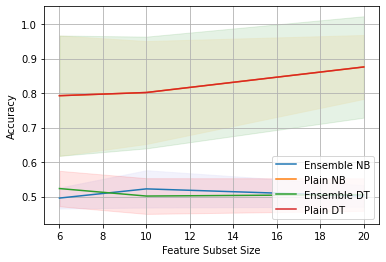

Wall time: 1.19 s


In [19]:
%%time

# Add number of iterations - better statistics
def eval_classifier_niter(_clf, _X, _y, _niter):
    return np.array([eval_classifier(_clf, _X, _y) for i in range(_niter)])

# Get the X matrix starting from the high-ranked variables
def getX(_X, _ncols, _ranks):
    cols = [j for n, j in enumerate(_ranks) if n < _ncols]
    return np.array(_X[:,cols])

# Iterate over the features, adding 1 by 1 by starting from the first (the best) feature
valsNB, accNB, stdevNB = [6, 10, 20], [], []
for nc in valsNB:
    # feature order is coming from ranks
    X_nb = getX(X, nc, ranks)
    acc = eval_classifier_niter(clf_gnb, X_nb, y, 10)
    accNB += [np.mean(acc)]
    stdevNB += [np.std(acc)]

valsDT, accDT, stdevDT = [6, 10, 20], [], []
for nc in valsDT:
    # feature order is coming from ranks
    X_dt = getX(X, nc, ranks)
    acc = eval_classifier_niter(clf_dt, X_dt, y, 10)
    accDT += [np.mean(acc)]
    stdevDT += [np.std(acc)]
    
accF, stdevF = np.array(accF), np.array(stdevF)
accNB, stdevNB = np.array(accNB), np.array(stdevNB)
accD, stdevD = np.array(accD), np.array(stdevD)
accNB, stdevDT = np.array(accDT), np.array(stdevDT)

# Plot
plt.plot(valsF, accF, label='Ensemble NB')
plt.plot(valsNB, accNB, label='Plain NB')
plt.plot(valsD, accD, label='Ensemble DT')
plt.plot(valsDT, accDT, label='Plain DT')
plt.fill_between(valsF, accF-stdevF, accF+stdevF, color='lavender', alpha=0.5)
plt.fill_between(valsNB, accNB-stdevNB, accNB+stdevNB, color='papayawhip', alpha=0.5)
plt.fill_between(valsD, accD-stdevD, accD+stdevD, color='red', alpha=0.1)
plt.fill_between(valsDT, accDT-stdevDT, accDT+stdevDT, color='green', alpha=0.1)
plt.xlabel('Feature Subset Size')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid()
plt.show()